In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import  SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('Titanic-Dataset.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df['family'] = df['Parch'] + df['SibSp']

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [8]:
df = df[['Age','Fare','family','Survived']]

In [9]:
df

,Age,Fare,family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,30.0000,0,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      891 non-null    float64
 2   family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [11]:
df.isnull().mean()

Age         0.198653
Fare        0.000000
family      0.000000
Survived    0.000000
dtype: float64

In [12]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [14]:
x_train.shape, x_test.shape

((712, 3), (179, 3))

In [18]:
x_train.isnull().mean()

Age       0.196629
Fare      0.000000
family    0.000000
dtype: float64

In [19]:
mean_age = x_train['Age'].mean()
mediun_age = x_train['Age'].median()

In [20]:
x_train['Age_median'] = x_train['Age'].fillna(mediun_age)
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)

In [22]:
x_train.sample(5)

,Age,Fare,family,Age_median,Age_mean
444,NaN,8.1125,0,28.0,29.498846
116,70.5,7.7500,0,70.5,70.500000
285,33.0,8.6625,0,33.0,33.000000
307,17.0,108.9000,1,17.0,17.000000
106,21.0,7.6500,0,21.0,21.000000


In [24]:
print('orginal Age Variance ',x_train['Age'].var())
print(' Age Vaiance after median imputaion',x_train['Age_median'].var())
print(' Age Vaiance after mean imputaion',x_train['Age_mean'].var())

orginal Age Variance  210.2517072477435
 Age Vaiance after median imputaion 169.20731007048155
 Age Vaiance after mean imputaion 168.85193366872227


<Axes: ylabel='Density'>

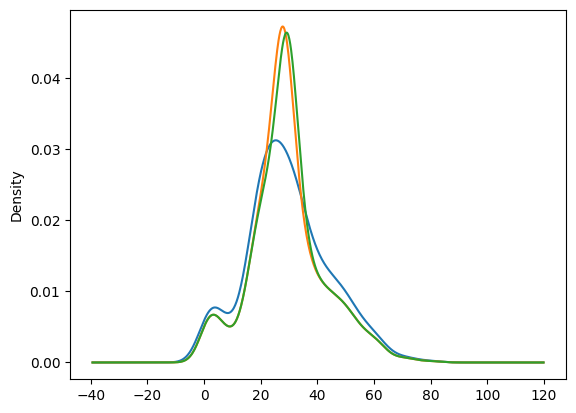

In [27]:
# origianl data distribution
x_train['Age'].plot(kind='kde')

# varible imputed with median
x_train['Age_median'].plot(kind='kde')


# varible imputed with mean
x_train['Age_mean'].plot(kind='kde')

In [28]:
x_train.cov()

,Age,Fare,family,Age_median,Age_mean
Age,210.251707,71.580633,-6.993325,210.251707,210.251707
Fare,71.580633,2700.831981,18.495747,61.261919,57.485994
family,-6.993325,18.495747,2.830892,-5.587710,-5.616299
Age_median,210.251707,61.261919,-5.587710,169.207310,168.851934
Age_mean,210.251707,57.485994,-5.616299,168.851934,168.851934


In [29]:
x_train.corr()

,Age,Fare,family,Age_median,Age_mean
Age,1.000000,0.088103,-0.319651,1.000000,1.000000
Fare,0.088103,1.000000,0.211525,0.090622,0.085126
family,-0.319651,0.211525,1.000000,-0.255307,-0.256883
Age_median,1.000000,0.090622,-0.255307,1.000000,0.998949
Age_mean,1.000000,0.085126,-0.256883,0.998949,1.000000


<Axes: >

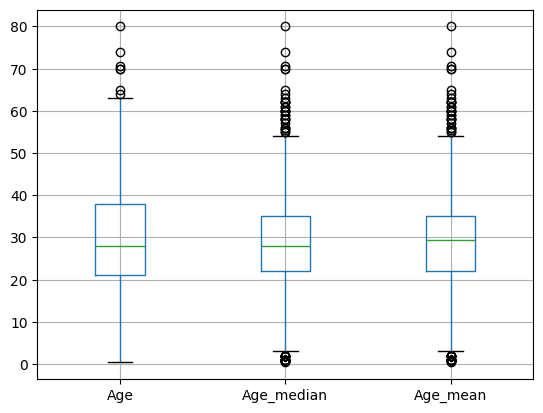

In [32]:
x_train[['Age','Age_median','Age_mean']].boxplot()

### THis outlier need to be remvove

In [33]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
imputer1 = SimpleImputer(strategy='median')

In [36]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age'])
],remainder='passthrough')

In [37]:
trf.fit(x_train)

c:\Users\parth\OneDrive\Desktop\one\ml100\venv\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age'])])

In [38]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [39]:
x_train =trf.transform(x_train)
x_test =trf.transform(x_test)

In [40]:
x_train

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    ,  14.1083,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]], shape=(712, 3))